In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("financial_regression.csv")
df.tail()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
3899,2024-10-17,585.91,586.1200,582.1600,582.35,34393714.0,3.9600,496.44,496.490,491.1901,...,96.0259,94.5400,95.68,52414.0,1.4859,247.75,249.06,247.62,248.63,5176170.0
3900,2024-10-18,584.07,585.3900,582.5800,584.59,37416801.0,2.8100,494.06,495.570,493.3000,...,99.6600,97.2700,99.46,205027.0,2.3900,250.00,251.37,249.90,251.27,7833614.0
3901,2024-10-21,583.85,584.8500,580.6001,583.63,36439010.0,4.2499,493.25,496.230,491.3100,...,98.3500,95.8900,97.35,227394.0,2.4600,252.74,253.14,250.73,251.22,9258590.0
3902,2024-10-22,581.05,584.5000,580.3800,583.32,34183835.0,4.1200,492.73,497.445,491.9700,...,99.5899,97.9600,99.41,136431.0,1.6299,253.06,253.94,252.52,253.93,5756321.0
3903,2024-10-23,581.26,581.7086,574.4150,577.99,47444991.0,7.2936,493.59,494.250,485.0500,...,98.5500,96.4643,97.53,81133.0,2.0857,253.08,253.18,250.20,250.87,7899995.0


In [3]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df.drop(columns=['date'], inplace=True)

In [4]:
for i in df.columns:
    df[i] = df[i].fillna(df[i].mean())

In [5]:
pd.unique(df)

C:\Users\Windows10\AppData\Local\Temp\ipykernel_24632\656283662.py:1: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  pd.unique(df)


array(['sp500 open', 'sp500 high', 'sp500 low', 'sp500 close',
       'sp500 volume', 'sp500 high-low', 'nasdaq open', 'nasdaq high',
       'nasdaq low', 'nasdaq close', 'nasdaq volume', 'nasdaq high-low',
       'us_rates_%', 'CPI', 'usd_chf', 'eur_usd', 'GDP', 'silver open',
       'silver high', 'silver low', 'silver close', 'silver volume',
       'silver high-low', 'oil open', 'oil high', 'oil low', 'oil close',
       'oil volume', 'oil high-low', 'platinum open', 'platinum high',
       'platinum low', 'platinum close', 'platinum volume',
       'platinum high-low', 'palladium open', 'palladium high',
       'palladium low', 'palladium close', 'palladium volume',
       'palladium high-low', 'gold open', 'gold high', 'gold low',
       'gold close', 'gold volume', 'year', 'month', 'day', 'day_of_week',
       None], dtype=object)

In [6]:
df = df.drop(labels = ['us_rates_%', 'CPI', 'GDP'], axis=1)

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

sp500 open            0
sp500 high            0
sp500 low             0
sp500 close           0
sp500 volume          0
sp500 high-low        0
nasdaq open           0
nasdaq high           0
nasdaq low            0
nasdaq close          0
nasdaq volume         0
nasdaq high-low       0
usd_chf               0
eur_usd               0
silver open           0
silver high           0
silver low            0
silver close          0
silver volume         0
silver high-low       0
oil open              0
oil high              0
oil low               0
oil close             0
oil volume            0
oil high-low          0
platinum open         0
platinum high         0
platinum low          0
platinum close        0
platinum volume       0
platinum high-low     0
palladium open        0
palladium high        0
palladium low         0
palladium close       0
palladium volume      0
palladium high-low    0
gold open             0
gold high             0
gold low              0
gold close      

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sp500 open          3904 non-null   float64
 1   sp500 high          3904 non-null   float64
 2   sp500 low           3904 non-null   float64
 3   sp500 close         3904 non-null   float64
 4   sp500 volume        3904 non-null   float64
 5   sp500 high-low      3904 non-null   float64
 6   nasdaq open         3904 non-null   float64
 7   nasdaq high         3904 non-null   float64
 8   nasdaq low          3904 non-null   float64
 9   nasdaq close        3904 non-null   float64
 10  nasdaq volume       3904 non-null   float64
 11  nasdaq high-low     3904 non-null   float64
 12  usd_chf             3904 non-null   float64
 13  eur_usd             3904 non-null   float64
 14  silver open         3904 non-null   float64
 15  silver high         3904 non-null   float64
 16  silver

In [9]:
X = df.drop(['gold high'], axis=1)
Y = df['gold high']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
test_data_prediction = model.predict(X_test)
test_data_prediction

array([164.61493059, 192.17049889, 170.24912167, 140.59860816,
       159.87064129, 189.94289171, 182.86919053, 149.83918744,
       130.86245399, 127.08527902, 124.30444816, 159.31505508,
       221.63471318, 157.01376928, 111.04293187, 184.08118324,
       167.5805513 , 121.24343277, 104.98838024, 189.65291686,
       159.40039348, 136.36326198, 125.48076177, 188.04044595,
       112.96988226, 120.16142305, 174.38048795, 117.27655156,
       159.89330428, 154.43929829, 135.30755907, 124.65548352,
       160.48310197, 172.32813086, 156.90553214, 168.69669095,
       152.21018466, 120.67549117, 185.70506145, 119.22537716,
       175.51517277, 107.21843676, 117.21236084, 142.08637763,
       125.65173346, 112.55541173, 171.62602134, 172.83801386,
       122.94153985, 121.44248529, 161.01404957, 145.4428462 ,
       125.43295576, 161.57325732, 186.07946588, 133.55094208,
       108.57584105, 186.5839805 , 157.54278263, 128.01407687,
       125.60414712, 116.19908863, 141.91403857, 167.10

In [13]:
# R squared error
from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_error
r2 = r2_score(Y_test, test_data_prediction)
rmse = root_mean_squared_error(Y_test, test_data_prediction)
mae = mean_absolute_error(Y_test, test_data_prediction)
print('R squared error:', r2)
print("rmse:",rmse)
print("mae:",mae)

R squared error: 0.9999295369980733
rmse: 0.25275798021067025
mae: 0.1772367381763414


Compare the actual values and predicted values in a plot

In [14]:
Y_test = list(Y_test)

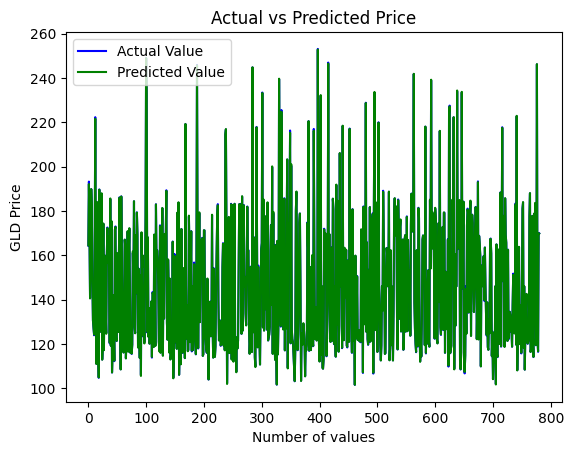

In [15]:
import matplotlib.pyplot as plt
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()